# Entendimiento de datos
En este notebook se abordan dos aspectos importantes para el entendimiento de un conjunto de datos, buscando responder a las necesidades de una empresa en términos de análisis de información:
* Exploración y perfilamiento de datos
    * Carga
    * Descripción básica
    * Visualización
    * Perfilamiento

* Calidad de datos e ideas de preparación
  * Completitud
  * Unicidad / Duplicidad
  * Validez / Estandarizacón


In [7]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Este comando es requerido para que las visualizaciones se muestren en este notebook
%matplotlib inline

In [8]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

# Exploración y perfilamiento de datos

## 1. Carga de los datos

In [24]:
# Cambiar por ruta correcta
ruta_archivo = r'202320_Laboratorio 2 - Regresión_data_laptop_data_train.csv'



# Lectura de datos en formato CSV
# Los datos son almacenados en memoria usando una estructura de datos de Pandas conocida como dataframe
df_tracks = pd.read_csv(ruta_archivo, sep=',')

In [25]:
# Dimensiones del dataframe
df_tracks.shape

(1216, 14)

In [26]:
# Impresión de algunos registros del dataframe
df_tracks.sample(5) # Muestra aleatoria
#df_tracks.head(5) # Primeras Filas
#df_tracks.tail(5) # Ultimas Filas

id Company            TypeName  Ram  Weight      Price  TouchScreen  \
379   1102    Acer            Notebook    4    2.20   9.317895            0   
529     61    Dell           Ultrabook    8    1.70  10.754346            0   
735    749      HP         Workstation   16    3.00  12.362418            0   
205     95    Acer  2 in 1 Convertible    8    1.50  10.717262            1   
1149   990      HP             Netbook    8    0.97  11.529372            0   

      Ips         Ppi              Cpu_brand  HDD  SSD Gpu_brand       Os  
379     0  100.454670  Other Intel Processor  0.0   16     Intel   Others  
529     0  157.350512          Intel Core i5  0.0  256     Intel  Windows  
735     1  127.335675  Other Intel Processor  0.0  256    Nvidia  Windows  
205     1  165.632118          Intel Core i5  0.0  256     Intel  Windows  
1149    0  176.232574  Other Intel Processor  0.0  512     Intel  Windows

## 2. Descripción de los datos

In [27]:
# Impresión del tipo de dato asociado a cada columna
df_tracks.dtypes

id               int64
Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
Cpu_brand       object
HDD            float64
SSD              int64
Gpu_brand       object
Os              object
dtype: object

#### 2.1 Datos numéricos

In [41]:
# Se calculan las estadísticas principales de las columnas numéricas
df_tracks.describe()

id          Ram       Weight        Price  TouchScreen  \
count  1216.000000  1216.000000  1193.000000  1201.000000  1216.000000   
mean    637.925164     8.458882     2.401572    13.114402     0.145559   
std     367.482876     5.094332     4.844791    28.659102     0.352809   
min       0.000000     2.000000     0.690000     9.134616     0.000000   
25%     319.750000     4.000000     1.500000    10.403650     0.000000   
50%     638.500000     8.000000     2.040000    10.882316     0.000000   
75%     954.250000     8.000000     2.320000    11.288115     0.000000   
max    1272.000000    64.000000    97.729949   499.766079     1.000000   

               Ips          Ppi           HDD          SSD  
count  1216.000000  1204.000000   1200.000000  1216.000000  
mean      0.285362   183.830716    441.218800   187.529605  
std       0.451772   449.708876    927.052855   186.902926  
min       0.000000    90.583402      0.000000     0.000000  
25%       0.000000   127.335675      0.000000     0.000000  
50%       0.000000   141.211998      0.000000   256.000000  
75%       1.000000   157.350512   1000.000000   256.000000  
max       1.000000  7328.468865  24127.543112  1024.000000

## 3. Visualización de datos


In [44]:
df_top = df_tracks[['Ram', 'Weight', 'Price', 'TouchScreen']].groupby('Ram').sum().sort_values('Ram', ascending = False).head(20)

In [45]:
df_top

Weight        Price  TouchScreen
Ram                                       
64      3.580000    12.263341            0
32     62.670000   193.103091            3
24      6.570000    23.092750            1
16    503.198955  2868.775106           42
12     55.800000   275.690134            7
8    1323.456258  8130.836353           94
6      73.100000   342.876893            3
4     817.869735  3780.659352           26
2      18.830000   123.100006            1

In [48]:
df_plot = df_tracks.loc[df_tracks.Ram.isin(df_top.index)]

In [49]:
df_plot.shape

(1216, 14)

### 1.1 Diagrama de puntos (numérico vs. numérico)

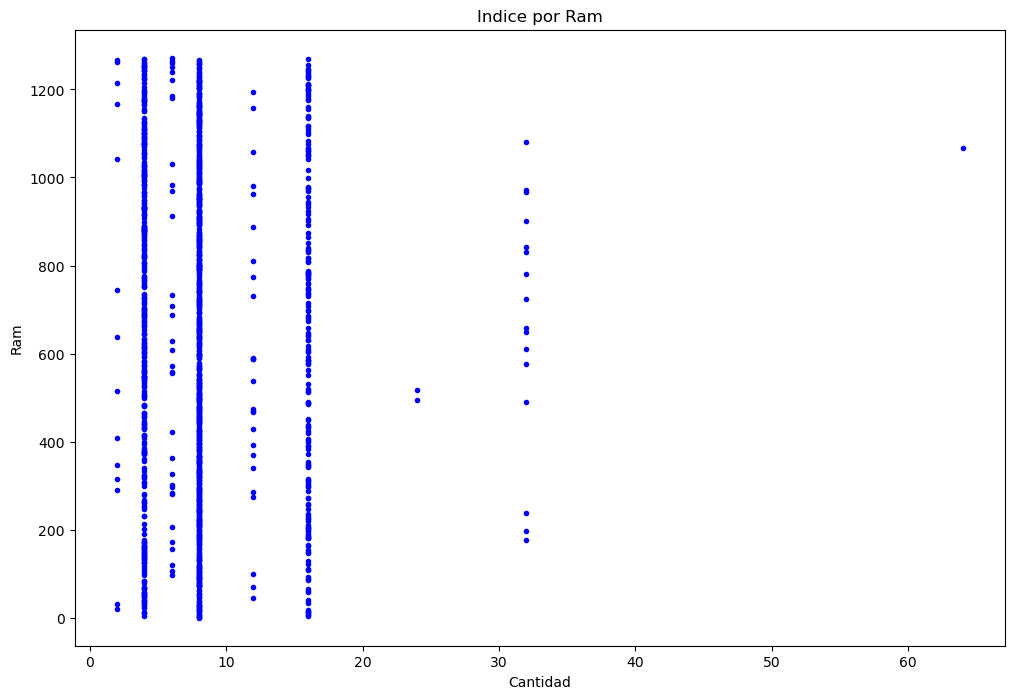

In [56]:
# Visualización de un scatter plot usando matplotlib
plt.figure(figsize = (12, 8))
plt.plot(df_plot['Ram'], df_plot['id'], '.', color = 'blue')
plt.title('Indice por Ram')
plt.xlabel('Cantidad')  
plt.ylabel('Ram')  
plt.show()

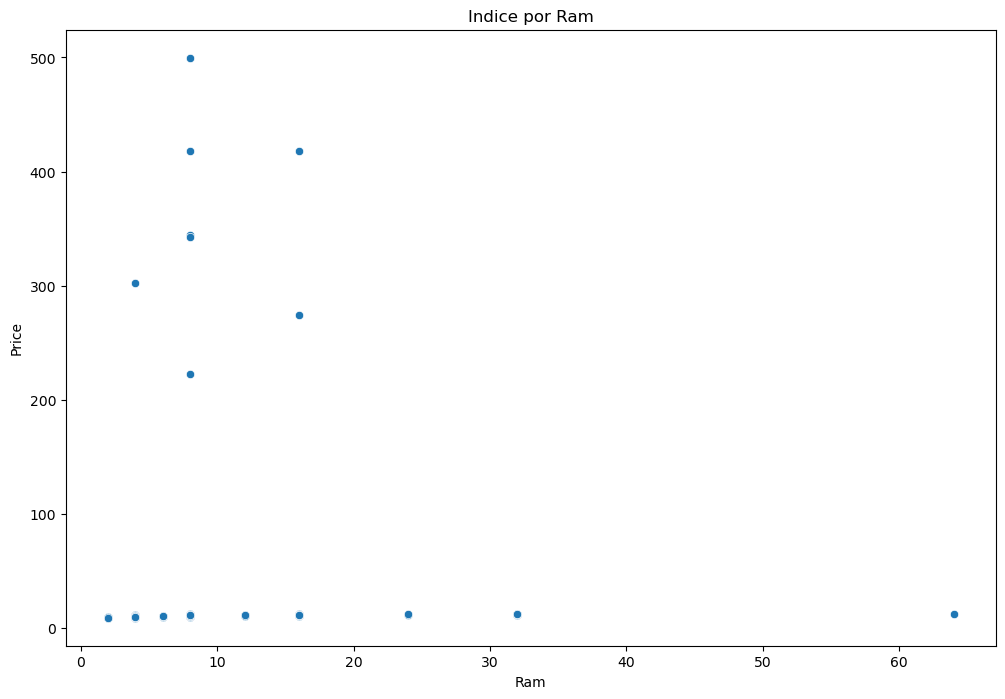

In [61]:
# Visualización de un scatter plot usando seaborn
fig = plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_plot, x = 'Ram', y = 'Price')
plt.title('Indice por Ram')
plt.xlabel('Ram')  
plt.ylabel('Price')  
plt.show()

### 1.3 Histograma (numérico)

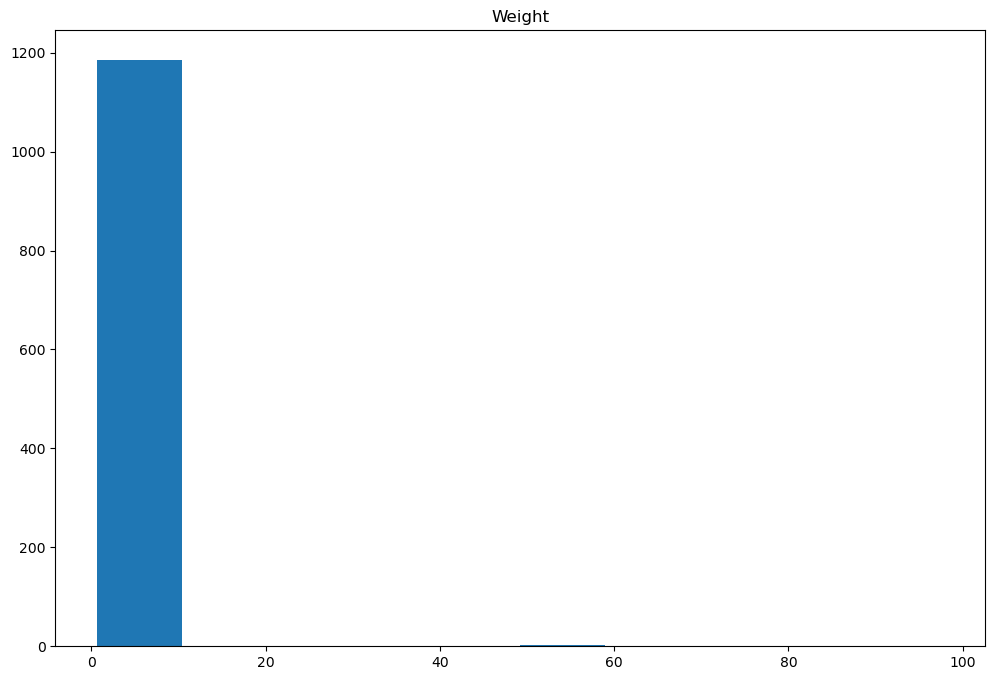

In [60]:
plt.figure(figsize = (12, 8))
plt.hist(df_plot['Weight'], bins = 10)
plt.title('Weight')  
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


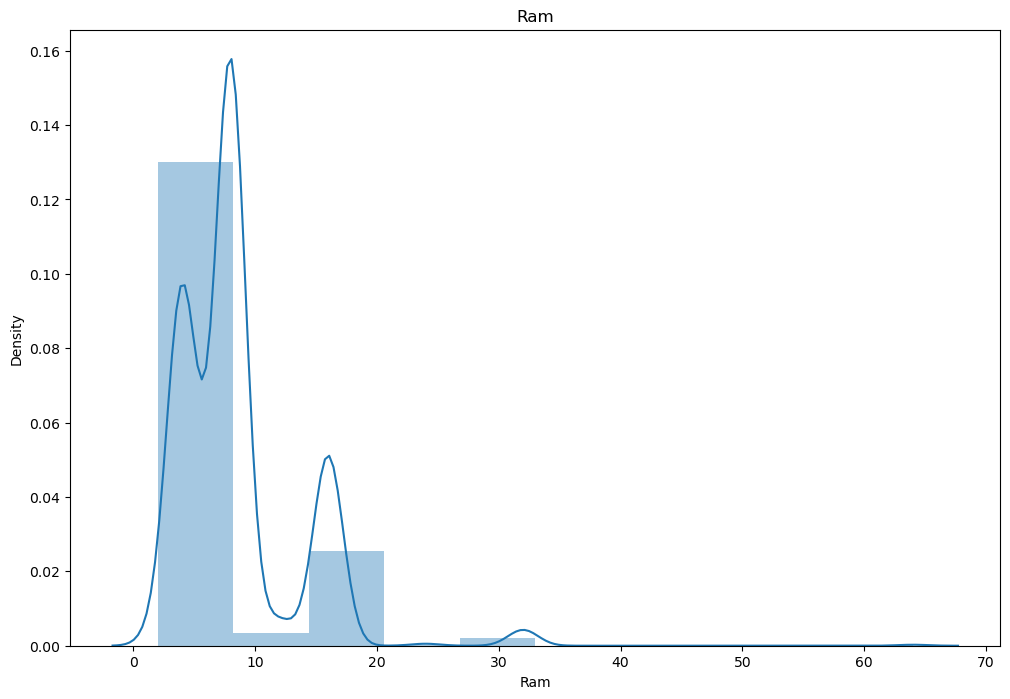

In [59]:
plt.figure(figsize = (12, 8))
plt.tight_layout()
sns.distplot(df_plot['Ram'], bins = 10)
plt.title('Ram')  
plt.show()

## 2. Perfilamiento

Para realizar un perfilamiento general de los datos se puede usar la librería Pandas Profiling.

Esta librería, a partir de los tipos de datos identificados por Pandas, calcula un conjunto de estadísticas y construye algunas visualizaciones estándares para datos de tipo numérico, categórico, temporales, entre otros.

La documentación oficial de Pandas Profiling se puede encontrar aquí: [https://github.com/ydataai/pandas-profiling](https://github.com/pandas-profiling/pandas-profiling).

In [62]:
!pip install pandas-profiling --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [63]:
import pandas_profiling

C:\Users\Camilo\AppData\Local\Temp\ipykernel_8160\1591302161.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [64]:
profile = pandas_profiling.ProfileReport(df_tracks)

In [65]:
# Esta parte del código puede fallar por problemas con la versión de pandas_profiling
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [66]:
# Puede revisar la documentación de la librería para averiguar como embeber el reporte generado en el notebook
# En este caso se decide exportar el reporte a un archivo HTML
profile.to_file('spotify_db_profile.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Importante:** En general es buena idea utilizar este tipo de herramientas que automatizan algunos pasos en el proceso de exploración de datos, sin embargo, bajo ningún escenario en ejercicio de exploración se puede limitar solo al uso de esta herramienta. El análisis de los resultados obtenidos es lo más importante.

## Calidad y preparación de datos

En este punto vamos a analizar diferentes dimensiones de calidad, de acuerdo con los datos y el problema a abordar. Recuerda que el objetivo es entender cómo se encuentran los datos para determinar el esfuerzo requerido para su preparación posterior.

## 1. Completitud
Buscar registros con valores faltantes y decidir, desde el contexto del  negocio, que se puede hacer con ellos. Por lo general podemos:
* Eliminar
* Reemplazar

In [67]:
# Se calcula el porcentaje de valores vacios de cada columna
(df_tracks.isnull().sum() / df_tracks.shape[0]).sort_values(ascending = False)

Weight         0.018914
HDD            0.013158
Price          0.012336
Ppi            0.009868
id             0.000000
Company        0.000000
TypeName       0.000000
Ram            0.000000
TouchScreen    0.000000
Ips            0.000000
Cpu_brand      0.000000
SSD            0.000000
Gpu_brand      0.000000
Os             0.000000
dtype: float64

En este punto es importante determinar opciones a plantear para la transformación de los datos. Algunas estrategias para solventar este tipo de problemas de calidad son:
- Para columnas numéricas: Imputar por la media o la mediana. También se puede imputar por estas mismas estadísticas pero calculadas a partir de una columna categórica.
- Para columnas categórcas: Imputar por la moda. También se puede imputar por esta misma estadística pero calculada a partir de otra columna categórica.

## 2. Unicidad / Duplicidad
Identificar las filas que tienen valores idénticos, ya sea en todas sus columnas o en aquellas que deben tener valores únicos, como lo puede ser el identificador o alguna combinación única de columnas: nombre de canción, artista y año.

In [72]:
# En este caso se revisan duplicados solo por #
# Se imprimen algunos de los registros duplicados para propósitos de comparación

df_tracks.loc[df_tracks.duplicated(subset = 'id', keep = False)].sort_values(by = 'id').head(6)

id Company            TypeName  Ram  Weight      Price  TouchScreen  \
317   12   Apple           Ultrabook   16    1.83  11.775302            0   
363   12   Apple           Ultrabook   16    1.83  11.775302            0   
775   12   Apple           Ultrabook   16    1.83  11.775302            0   
658  182  Lenovo  2 in 1 Convertible   16    1.40  11.497961            1   
798  182  Lenovo  2 in 1 Convertible   16    1.40  11.497961            1   
128  645  Lenovo            Notebook    4    1.43   9.588689            0   

     Ips         Ppi              Cpu_brand  HDD  SSD Gpu_brand       Os  
317    1  220.534624          Intel Core i7  0.0  256       AMD      Mac  
363    1  220.534624          Intel Core i7  0.0  256       AMD      Mac  
775    1  220.534624          Intel Core i7  0.0  256       AMD      Mac  
658    1  316.965060          Intel Core i7  0.0  512     Intel  Windows  
798    1  316.965060          Intel Core i7  0.0  512     Intel  Windows  
128    0  111.935204  Other Intel Processor  0.0    0     Intel  Windows

In [73]:
# Duplicados
df_tracks.duplicated(subset = 'id', keep = False).sum()

10

In [75]:
# Pandas para eliminar registros duplicados
df_tracks.drop_duplicates(subset = 'id', keep = 'first', inplace = True)

In [76]:
df_tracks.duplicated(subset = 'id', keep = False).sum()

0

## 3. Consistencia
Este proceso se basa en tener conherencia entre los diferentes valores de la columna. Es decir, que:
No se tengan difrentes cadenas o números para la misma categoría en una columna con valores categóricos.


## 3.1 Categóricos


In [79]:
# Revisamos los valores de la unica variable categorica: titleType
df_tracks['Os'].value_counts()

Windows    1045
Others      144
Mac          21
Name: Os, dtype: int64

In [80]:
#Minuculas para normalizar las posibles diferencias por mayus 
df_tracks['Os'] = df_tracks['Os'].str.strip().str.lower()
df_tracks['Os'].value_counts()

windows    1045
others      144
mac          21
Name: Os, dtype: int64

In [81]:
df_tracks['Company'] = df_tracks['Company'].str.strip().str.lower()
df_tracks['TypeName'] = df_tracks['TypeName'].str.strip().str.lower()
df_tracks['Cpu_brand'] = df_tracks['Cpu_brand'].str.strip().str.lower()
df_tracks['Gpu_brand'] = df_tracks['Gpu_brand'].str.strip().str.lower()
df_tracks['Os'] = df_tracks['Os'].str.strip().str.lower()

## 4 . Validez / Estandarización
Validez es la correctitud de un valor a nivel principalmente de formato y valor de una columna de acuerdo al contexto. Ejemplos de esta dimensión son:
* Que los números dentro de una columna categórica pertenezcan a un rango establecido.
* Que las fechas de una columna se encuentren dentro de un rango de fechas establecido.

Un caso especial de la validez es la estandarización de datos. Esta hace referencia a que la representación de de los valores de las columnas cumpla un cierto estandar a través de la organización, garantizando que se pueden juntar o comparar columnas entre diferentes tablas. De nuevo, estos estandares por lo general vienen preestablecidos y el proceso de estandarización debe simplemente acoplarse a ellos.

## 4.1 Revisión a nivel de datos **numéricos**

In [82]:
# Resumen
number_cols = df_tracks.dtypes[(df_tracks.dtypes == np.int64) | (df_tracks.dtypes == np.float64)].index
number_cols = df_tracks.select_dtypes(include = ['int', 'float']).columns
number_cols

Index(['id', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD',
       'SSD'],
      dtype='object')

In [83]:
df_tracks[number_cols].describe()

id          Ram       Weight        Price  TouchScreen  \
count  1210.000000  1210.000000  1187.000000  1197.000000  1210.000000   
mean    638.606612     8.451240     2.404368    13.120935     0.145455   
std     366.845797     5.088272     4.856803    28.706715     0.352704   
min       0.000000     2.000000     0.690000     9.134616     0.000000   
25%     321.250000     4.000000     1.500000    10.403650     0.000000   
50%     638.500000     8.000000     2.040000    10.882316     0.000000   
75%     953.750000     8.000000     2.320000    11.288115     0.000000   
max    1272.000000    64.000000    97.729949   499.766079     1.000000   

               Ips          Ppi           HDD          SSD  
count  1210.000000  1198.000000   1194.000000  1210.000000  
mean      0.282645   183.789473    441.760938   187.613223  
std       0.450471   450.807481    928.748019   186.879532  
min       0.000000    90.583402      0.000000     0.000000  
25%       0.000000   127.335675      0.000000     0.000000  
50%       0.000000   141.211998      0.000000   256.000000  
75%       1.000000   157.350512   1000.000000   256.000000  
max       1.000000  7328.468865  24127.543112  1024.000000

Podemos ver que "isAdult:" realmente no esta haciando nada y se podria elminiar 

y que calificacion promedio tiene calificaciones no permitidas deacuerdo al diccionario 

In [85]:
df_tracks = df_tracks.loc[df_tracks['Ram'] <= 10]

In [86]:
df_tracks[number_cols].describe()

id         Ram      Weight       Price  TouchScreen  \
count   977.000000  977.000000  956.000000  965.000000   977.000000   
mean    638.175026    6.425793    2.329734   12.816460     0.126919   
std     367.833922    1.964561    5.215152   27.935954     0.333053   
min       0.000000    2.000000    0.690000    9.134616     0.000000   
25%     322.000000    4.000000    1.500000   10.283659     0.000000   
50%     638.000000    8.000000    2.000000   10.731330     0.000000   
75%     954.000000    8.000000    2.200000   11.069796     0.000000   
max    1272.000000    8.000000   97.729949  499.766079     1.000000   

              Ips          Ppi           HDD          SSD  
count  977.000000   967.000000    962.000000   977.000000  
mean     0.251791   181.112142    411.083742   145.183214  
std      0.434264   454.780434    990.849694   145.619733  
min      0.000000    90.583402      0.000000     0.000000  
25%      0.000000   111.935204      0.000000     0.000000  
50%      0.000000   141.211998      0.000000   128.000000  
75%      1.000000   157.350512   1000.000000   256.000000  
max      1.000000  7328.468865  24127.543112  1024.000000

In [87]:
print(df_tracks.values[1])

[712 'dell' 'notebook' 8 1.98 10.56311104105693 0 0 141.21199808219862
 'intel core i5' 1000.0 0 'intel' 'others']


## 5 Implementacion Algoritmos

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import DBSCAN

In [28]:
# Selecciona columnas numéricas
df_tracks_numeric = df_tracks.select_dtypes(include=[np.number])

# Selecciona columnas categóricas
categorical_cols = df_tracks.select_dtypes(include=[object])

# Codifica columnas categóricas usando one-hot encoding
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(categorical_cols)

# Combina las características numéricas y codificadas
data_combined = np.hstack((df_tracks_numeric, categorical_encoded.toarray()))

# Escala las características
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_combined)

# Imputar los valores faltantes
imputer = SimpleImputer(strategy='mean')  
data_scaled_imputed = imputer.fit_transform(data_scaled)

### Implementación K-Means

In [29]:
#Importar KMeans
from sklearn.cluster import KMeans
# Declarar los parámetros
k = 5
n_init = 10
max_iter = 300

# Inicializar los centroides
kmeans = KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter)

# Agrupar los datos
kmeans.fit(data_scaled_imputed)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Obtener la inercia del modelo
inertia = kmeans.inertia_

# Imprimir el resultado
print(labels)
print(centroids)
print(inertia)



[1 0 2 ... 2 4 1]
[[-0.15902083 -0.15834278  0.         ... -0.16985718 -0.08542999
  -0.04920347]
 [-0.39973128 -0.40490315  0.         ...  0.04122365 -0.01574654
   0.0130738 ]
 [ 0.96243229  0.9738817   0.         ... -0.06626397  0.06284618
  -0.01845955]
 [ 0.07116125  0.07557418  0.         ... -0.12061201 -0.08542999
  -0.04920347]
 [ 0.41780898  0.42826863  0.         ... -0.16985718 -0.08542999
  -0.04920347]]
112839915.03027436


### Implementación DBScan

In [30]:
# Creación del modelo DBScan
eps = 3  # Epsilon
min_samples = 5  # Número mínimo de puntos para formar un cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Ajuste del modelo
clusters = dbscan.fit_predict(data_scaled_imputed)

# Resultados
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Número de clusters excluyendo el ruido
n_noise = list(clusters).count(-1)  # Cantidad de puntos ruido

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de puntos clasificados como ruido: {n_noise}")

Número de clusters encontrados: 0
Número de puntos clasificados como ruido: 7453


In [31]:
for cluster_id in set(clusters):
    if cluster_id == -1:
        print(f"Puntos clasificados como ruido: {np.sum(clusters == cluster_id)}")
    else:
        print(f"Puntos en el cluster {cluster_id}: {np.sum(clusters == cluster_id)}")

Puntos clasificados como ruido: 7453


In [43]:
print(clusters)

[-1 -1 -1 ... -1 -1 -1]


### Implementación GMM

In [44]:
from sklearn.mixture import GaussianMixture

In [45]:

n_components = 2  # Número de componentes (clusters) que deseas encontrar


# Crea una instancia del modelo GMM
gmm = GaussianMixture(n_components=n_components)

# Ajusta el modelo a los datos
gmm.fit(data_scaled_imputed)

# Predice las etiquetas de cluster para cada punto de datos
labels = gmm.predict(data_scaled_imputed)

# Obtiene las probabilidades de pertenencia a cada cluster
probs = gmm.predict_proba(data_scaled_imputed)

# Visualiza los resultados en un scatter plot
plt.scatter(data_scaled_imputed[:, 0], data_scaled_imputed[:, 1], c=labels, cmap='viridis')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Clustering con Modelo de Mezcla Gaussiana (GMM)')
plt.show()

# Validación de Hiperparametros

/Users/futuna/Downloads/gfh/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/futuna/Downloads/gfh/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/futuna/Downloads/gfh/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/futuna/Downloads/gfh/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

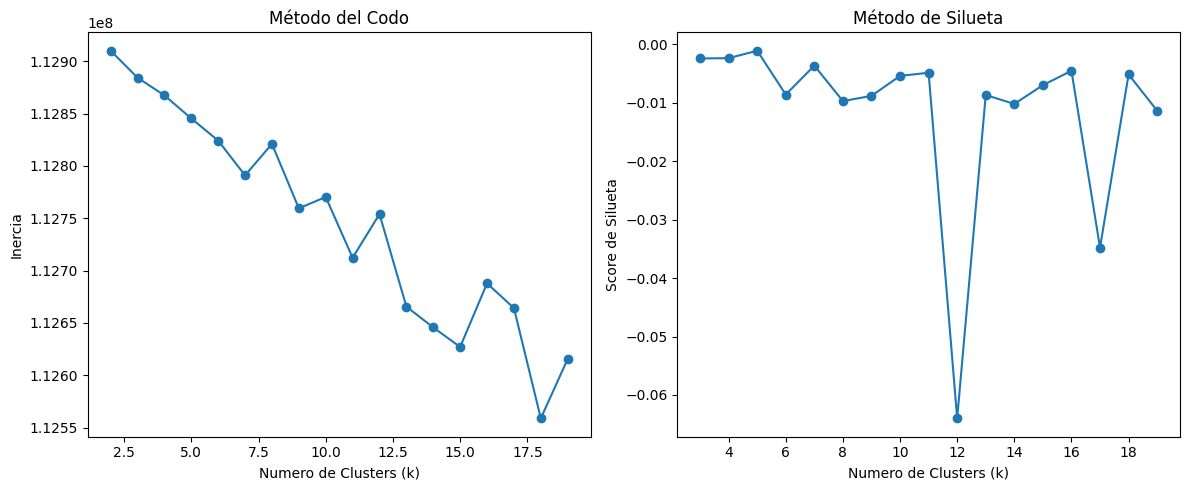

In [33]:
from sklearn.metrics import silhouette_score

# Range of k values to test
k_values = range(2, 20)

# Lists to store evaluation scores
inertia_values = []
silhouette_scores = []

# Loop through different k values and perform K-means clustering
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_imputed)
    
    # Append the inertia (within-cluster sum of squares) to the list
    inertia_values.append(kmeans.inertia_)
    
    # Compute the silhouette score and append it to the list
    if k > 1:
        silhouette_avg = silhouette_score(data_scaled_imputed, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)

# Plot the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Numero de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')

# Plot the Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values[1:], silhouette_scores[1:], marker='o')
plt.xlabel('Numero de Clusters (k)')
plt.ylabel('Score de Silueta')
plt.title('Método de Silueta')

plt.tight_layout()
plt.show()